In [1]:
import math
import numpy as np
import re
import os

from numpy import argmax
from collections import Counter
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
# Setup PATH and folder of images
directory = "/home/fizzer/Desktop/353_ws/plates"
labels = ['plates']
# print(labels)

In [8]:
alphanumeric = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
# Create mappings
char_to_int = dict((c, i) for i, c in enumerate(alphanumeric))
int_to_char = dict((i, c) for i, c in enumerate(alphanumeric))

# Invert one hot encode
def invert_one_hot(data):
    return int_to_char[argmax(data)]

def get_char(char):
    return int_to_char[char]

def get_int(data):
    return char_to_int[data]

In [23]:
plateNames = []
os.chdir(directory)
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        plate = filename.rsplit('.',1)
        plateNames.append(plate[0])
    else:
        continue  
print(plateNames)
# # Character positions on license plate
crop_size = (100, 50, 3)

lchar0 = (10,0,60,100)
lchar1 = (55,0,105,100)
lchar2 = (100,0,150,100)
lchar3 = (140,0,190,100)
license_char = [lchar0, lchar1, lchar2, lchar3]

pchar0 = (35,0,85,100)
pchar1 = (75,0,125,100)
pchar2 = (120,0,170,100)
parking_char = [pchar0, pchar1, pchar2]

imgset = []
plateset = []

for plate in plateNames:
    length = len(plate)
    if length != 0:
        if length == 4:
            char_set = license_char
        elif length == 3:
            char_set = parking_char
        image = Image.open(plate+".jpg")
    
        for i in range(length):
            crop = image.crop(char_set[i])
            imgset.append(np.array(crop))
            plateset.append(np.array(plate[i]))
#             plt.imshow(crop)
    
        image = Image.open(plate+".jpg")
    else:
        continue
X_data_orig = np.array(imgset)
Y_data_orig = np.array(plateset)

['MS83', 'PJ25', 'CI92', 'CU87', 'LC81', 'ZP93', 'EB27', 'LW21', 'FU69', 'NV83', 'P05', 'P11', 'P15', 'P10', 'P04', 'ZF84', 'IQ86', 'P14', 'P12', 'YP19', 'P03', 'CU94', 'XQ39', 'P13', 'CX30', 'WC83', 'QC61', 'QP74', 'AB51', 'P09', 'HV74', 'SX49', 'ZH00', 'P07', 'TX92', 'WA32', 'ZE77', 'P08', 'EH96', 'P02', 'QM60', 'P01', 'P06', 'AO50', 'NB48', 'BN48', 'QV40', 'JA05']


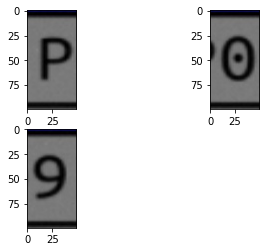

In [4]:
# Check slices of image
plateNumber = 29

plateCheck = plateNames[plateNumber]
length = len(plateCheck)
if length == 4:
    char_set = license_char
if length == 3:
    char_set = parking_char
    
image = Image.open(plateCheck+".jpg")

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
crop0 = image.crop(char_set[0])
ax1.imshow(crop0)
ax2 = fig.add_subplot(2,2,2)
crop1 = image.crop(char_set[1])
ax2.imshow(crop1)
ax3 = fig.add_subplot(2,2,3)
crop2 = image.crop(char_set[2])
ax3.imshow(crop2)

if length == 4:
    ax4 = fig.add_subplot(2,2,4)
    crop3 = image.crop(char_set[3])
    ax4.imshow(crop3)


In [5]:
NUMBER_OF_LABELS = 36
CONFIDENCE_THRESHOLD = 0.01

def convert_to_one_hot(Y, C):
    alphanumeric = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
    # Create mappings
    char_to_int = dict((c, i) for i, c in enumerate(alphanumeric))
    int_to_char = dict((i, c) for i, c in enumerate(alphanumeric))
    
    # Encodes the alphanumeric into its enumerated value
    integer_encoded = np.array([char_to_int[char] for char in Y])
    Y = np.eye(C)[integer_encoded.reshape(-1)].T
    return Y

# Normalize Image dataset
X_dataset = X_data_orig/255.0

# Conver Y dataset to on-hot encoding
Y_dataset = convert_to_one_hot(Y_data_orig, NUMBER_OF_LABELS).T

In [9]:
VALIDATION_SPLIT = 0.2

print("Total examples: {:d}\nTraining examples: {:f}\nTest examples: {:f}".
      format(X_dataset.shape[0],
             math.ceil(X_dataset.shape[0] * (1-VALIDATION_SPLIT)),
             math.floor(X_dataset.shape[0] * VALIDATION_SPLIT)))
print("X shape: " + str(X_dataset.shape))
print("Y shape: " + str(Y_dataset.shape))

Total examples: 177
Training examples: 142.000000
Test examples: 35.000000
X shape: (177, 100, 50, 3)
Y shape: (177, 36)


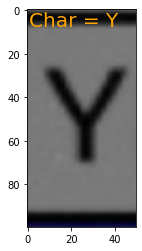

In [14]:
from ipywidgets import interact
import ipywidgets as ipywidgets

# Display images in the training data set.
def displayImage(index):
    plt.imshow(X_dataset[index])
    
    invert_Y_data = invert_one_hot(Y_dataset[index])
    
    caption = ("Char = " + str(invert_Y_data))#str(np,squeeze(Y_data_orig[:, index]))
    plt.text(0.5, 0.5, caption,
             color='orange', fontsize = 20,
             horizontalalignment = 'left', verticalalignment = 'top')
    
    # interact(displayImage, 
#         index=ipywidgets.IntSlider(min=0, max=X_dataset_orig.shape[0],
#                                    step=1, value=10))
displayImage(69)

In [15]:
# Start Training Convolution Neural Network
from keras import layers
from keras import models
from keras import optimizers

from keras.utils import plot_model
from keras import backend

Using TensorFlow backend.
/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python

In [16]:
# Reset weights
# - reinitializing the model parameters
def reset_weights(model):
    session = backend.get_session()
    for layer in model.layers:
        if hasattr(layer, 'kernal_initalizer'):
            layer.kernal.initializer.run(session=session)

In [24]:
# Model definition
conv_model = models.Sequential()
conv_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                             input_shape=crop_size))
conv_model.add(layers.MaxPool2D((2,2)))
conv_model.add(layers.Flatten())
conv_model.add(layers.Dropout(0.5))
conv_model.add(layers.Dense(512, activation='relu'))
conv_model.add(layers.Dense(36, activation='softmax'))
conv_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 98, 48, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 24, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 37632)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 37632)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               19268096  
_________________________________________________________________
dense_4 (Dense)              (None, 36)                18468     
Total params: 19,287,460
Trainable params: 19,287,460
Non-trainable params: 0
__________________________________________

In [25]:
# Loss function and learning rate
# Can change loss rate to see what happens
LEARNING_RATE = 1e-4
conv_model.compile(loss='categorical_crossentropy',
                   optimizer=optimizers.RMSprop(lr=LEARNING_RATE),
                   metrics=['acc'])

In [26]:
reset_weights(conv_model)

In [27]:
history_conv = conv_model.fit(X_dataset, Y_dataset, 
                              validation_split=VALIDATION_SPLIT, 
                              epochs=20, 
                              batch_size=16)


Train on 141 samples, validate on 36 samples
Epoch 1/20
141/141 [==============================] - 2s 14ms/step - loss: 3.6243 - acc: 0.0922 - val_loss: 3.2843 - val_acc: 0.1944
Epoch 2/20
141/141 [==============================] - 1s 11ms/step - loss: 3.1946 - acc: 0.1773 - val_loss: 3.4405 - val_acc: 0.0556
Epoch 3/20
141/141 [==============================] - 2s 11ms/step - loss: 3.0592 - acc: 0.1348 - val_loss: 3.0955 - val_acc: 0.3611
Epoch 4/20
141/141 [==============================] - 2s 11ms/step - loss: 2.8620 - acc: 0.2553 - val_loss: 3.0569 - val_acc: 0.3333
Epoch 5/20
141/141 [==============================] - 1s 11ms/step - loss: 2.7301 - acc: 0.2766 - val_loss: 2.9565 - val_acc: 0.3611
Epoch 6/20
141/141 [==============================] - 1s 11ms/step - loss: 2.5535 - acc: 0.3759 - val_loss: 3.1020 - val_acc: 0.1667
Epoch 7/20
141/141 [==============================] - 2s 11ms/step - loss: 2.4431 - acc: 0.3475 - val_loss: 2.7944 - val_acc: 0.2500
Epoch 8/20
141/141 [===

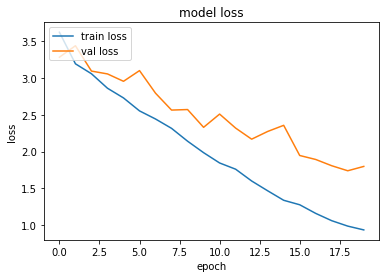

In [28]:
plt.plot(history_conv.history['loss'])
plt.plot(history_conv.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'], loc='upper left')
plt.show()

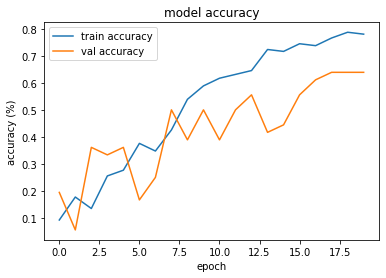

In [29]:
plt.plot(history_conv.history['acc'])
plt.plot(history_conv.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy (%)')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'val accuracy'], loc='upper left')
plt.show()

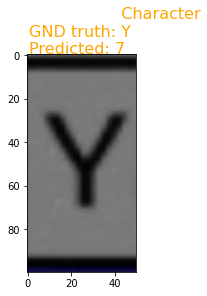

In [31]:
# Display images in the training data set. 
def displayImage(index):
    img = X_dataset[index]

    img_aug = np.expand_dims(img, axis=0)
    y_predict = conv_model.predict(img_aug)[0]

    plt.figure()
    plt.imshow(img)  
    caption = ("                  Character\n"+
             "GND truth: {:.2}\nPredicted: {:.2}".
             format(invert_one_hot(Y_dataset[index]),  
                    get_char(np.argmax(y_predict))))
    plt.text(0.5, 0.5, caption, 
           color='orange', fontsize = 16,
           horizontalalignment='left', verticalalignment='bottom') 

# interact(displayImage, 
#         index=ipywidgets.IntSlider(min=0, max=X_dataset_orig.shape[0],
#                                    step=1, value=10))

displayImage(69)



In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
         'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S',
         'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2',
         '3', '4', '5', '6', '7', '8', '9']

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
#     fig.tight_layout()
    fig.set_size_inches(18.5,18.5)
    return ax

np.set_printoptions(precision=2)

y_true = []
y_predict = []

for index in range(Y_dataset.shape[0]):
    img = X_dataset[index]

    img_aug = np.expand_dims(img, axis=0)
    y_predict.append(get_char(np.argmax(conv_model.predict(img_aug)[0])))
    y_true.append(get_char(np.argmax(Y_dataset[index])))

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_predict, classes=labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_predict, classes=labels, normalize=True, title='Normalized confusion matrix')

plt.show()

# print(y_predict)
# print(y_true)